In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, explained_variance_score


In [2]:
df = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
df2 = pd.read_csv('Plant_1_Generation_Data.csv')

In [3]:
df2

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [4]:
df3 = df.copy()
df3.insert(0, "Daily_yield", df2["DAILY_YIELD"])
df3

,Daily_yield,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,0.000000,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,0.000000,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,0.000000,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,0.000000,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,0.000000,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...,...
3177,5761.142857,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,5966.000000,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,5804.125000,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,6076.428571,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [5]:
df2["DAILY_YIELD"].iloc[0:3181].value_counts()

0.000000       963
6471.000000     19
5965.000000     19
6396.000000     19
6386.000000     19
              ... 
4184.000000      1
4057.714286      1
4221.714286      1
3695.250000      1
6076.428571      1
Name: DAILY_YIELD, Length: 1865, dtype: int64

In [6]:
df3["Daily_yield"].iloc[0:3181].value_counts()

0.000000       963
6471.000000     19
5965.000000     19
6396.000000     19
6386.000000     19
              ... 
4184.000000      1
4057.714286      1
4221.714286      1
3695.250000      1
6076.428571      1
Name: Daily_yield, Length: 1865, dtype: int64

In [7]:
df3.isnull().sum()

Daily_yield            0
DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [8]:
df3.index = pd.to_datetime(df3["DATE_TIME"])
print(df3.index)

DatetimeIndex(['2020-05-15 00:00:00', '2020-05-15 00:15:00',
               '2020-05-15 00:30:00', '2020-05-15 00:45:00',
               '2020-05-15 01:00:00', '2020-05-15 01:15:00',
               '2020-05-15 01:30:00', '2020-05-15 01:45:00',
               '2020-05-15 02:00:00', '2020-05-15 02:15:00',
               ...
               '2020-06-17 21:30:00', '2020-06-17 21:45:00',
               '2020-06-17 22:00:00', '2020-06-17 22:15:00',
               '2020-06-17 22:30:00', '2020-06-17 22:45:00',
               '2020-06-17 23:00:00', '2020-06-17 23:15:00',
               '2020-06-17 23:30:00', '2020-06-17 23:45:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=3182, freq=None)


In [9]:
df3.columns

Index(['Daily_yield', 'DATE_TIME', 'PLANT_ID', 'SOURCE_KEY',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')

In [10]:
import pytz

HST = pytz.timezone('Pacific/Honolulu')
                                                                            
df3.index = df3.index.tz_localize(pytz.utc)                                      
df3.index = df3.index.tz_convert(HST)                                             
df3.head()

,Daily_yield,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,,,
2020-05-14 14:00:00-10:00,0.0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-14 14:15:00-10:00,0.0,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2020-05-14 14:30:00-10:00,0.0,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
2020-05-14 14:45:00-10:00,0.0,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
2020-05-14 15:00:00-10:00,0.0,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [11]:
df3['year_day'] = df3.index.strftime('%j').astype(int)
df3.head()

,Daily_yield,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,year_day
DATE_TIME,,,,,,,,
2020-05-14 14:00:00-10:00,0.0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,135
2020-05-14 14:15:00-10:00,0.0,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,135
2020-05-14 14:30:00-10:00,0.0,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,135
2020-05-14 14:45:00-10:00,0.0,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,135
2020-05-14 15:00:00-10:00,0.0,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,135


In [12]:
df3['Day_Time(s)'] = df3.index.hour*60*60 + df3.index.minute*60 + df3.index.second
df3.head()

,Daily_yield,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,year_day,Day_Time(s)
DATE_TIME,,,,,,,,,
2020-05-14 14:00:00-10:00,0.0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,135,50400
2020-05-14 14:15:00-10:00,0.0,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,135,51300
2020-05-14 14:30:00-10:00,0.0,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,135,52200
2020-05-14 14:45:00-10:00,0.0,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,135,53100
2020-05-14 15:00:00-10:00,0.0,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,135,54000


In [13]:
df4 = df3.drop(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY'], axis = 1)
df4

,Daily_yield,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,year_day,Day_Time(s)
DATE_TIME,,,,,,
2020-05-14 14:00:00-10:00,0.000000,25.184316,22.857507,0.0,135,50400
2020-05-14 14:15:00-10:00,0.000000,25.084589,22.761668,0.0,135,51300
2020-05-14 14:30:00-10:00,0.000000,24.935753,22.592306,0.0,135,52200
2020-05-14 14:45:00-10:00,0.000000,24.846130,22.360852,0.0,135,53100
2020-05-14 15:00:00-10:00,0.000000,24.621525,22.165423,0.0,135,54000
...,...,...,...,...,...,...
2020-06-17 12:45:00-10:00,5761.142857,22.150570,21.480377,0.0,169,45900
2020-06-17 13:00:00-10:00,5966.000000,22.129816,21.389024,0.0,169,46800
2020-06-17 13:15:00-10:00,5804.125000,22.008275,20.709211,0.0,169,47700


In [14]:
d = df4.values
x = d[:,1:]
y = d[:,:1]
x, y

(array([[2.51843161e+01, 2.28575074e+01, 0.00000000e+00, 1.35000000e+02,
         5.04000000e+04],
        [2.50845887e+01, 2.27616679e+01, 0.00000000e+00, 1.35000000e+02,
         5.13000000e+04],
        [2.49357526e+01, 2.25923055e+01, 0.00000000e+00, 1.35000000e+02,
         5.22000000e+04],
        ...,
        [2.20082746e+01, 2.07092114e+01, 0.00000000e+00, 1.69000000e+02,
         4.77000000e+04],
        [2.19694947e+01, 2.07349628e+01, 0.00000000e+00, 1.69000000e+02,
         4.86000000e+04],
        [2.19092877e+01, 2.04279724e+01, 0.00000000e+00, 1.69000000e+02,
         4.95000000e+04]]),
 array([[   0.      ],
        [   0.      ],
        [   0.      ],
        ...,
        [5804.125   ],
        [6076.428571],
        [6023.428571]]))

In [15]:
d = df4.values
x = d[:,1:]
y = d[:,:1]



from sklearn.model_selection import train_test_split
X_train_full, X_test , y_train_full, y_test = train_test_split(x, y , test_size = .2, random_state=42)
X_train , X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = .2, random_state=42)

from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train_sc = s.fit_transform(X_train)
X_test_sc = s.fit_transform(X_test)
X_valid_sc = s.fit_transform(X_valid)

y_train_sc = s.fit_transform(y_train)
y_test_sc = s.fit_transform(y_test)
y_valid_sc = s.fit_transform(y_valid)


print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)




from keras.layers import Dense,Dropout, Flatten
from keras import regularizers
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()

model.add(Flatten(input_shape = X_train_sc.shape[1:]))
model.add(Dense(1024, activation = "relu",kernel_initializer="HeNormal", kernel_regularizer=regularizers.l2(l = .001) ))
model.add(Dropout(0.05))

model.add(Dense(512, activation = "relu" , kernel_regularizer=regularizers.l2(l = .001)))
model.add(Dropout(0.1))

model.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(l = .001)))
model.add(Dropout(0.1))

# model.add(Dense(64, activation = "relu"))
# model.add(Dropout(0.1))

model.add(Dense(32, activation = "relu", kernel_regularizer=regularizers.l2(l = .001)))
model.add(Dropout(0.1))



model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l2(l = .001)))
model.add(Dropout(.1))

model.add(Dense(1, activation="linear"))



import tensorflow as tf
model.compile(loss='mse',
              optimizer= "adam",
              metrics=['mae'])
hist = model.fit(X_train_sc, y_train_sc,
                batch_size=32, epochs=50,
                validation_data=(X_valid_sc, y_valid_sc))


(2036, 5) (509, 5) (637, 5) (2036, 1) (509, 1) (637, 1)
Epoch 1/50
64/64 [==============================] - 4s 25ms/step - loss: 3.7909 - mae: 0.7225 - val_loss: 3.3547 - val_mae: 0.5336
Epoch 2/50
64/64 [==============================] - 1s 18ms/step - loss: 3.1769 - mae: 0.5517 - val_loss: 2.9255 - val_mae: 0.4360
Epoch 3/50
64/64 [==============================] - 1s 18ms/step - loss: 2.7668 - mae: 0.4571 - val_loss: 2.5307 - val_mae: 0.4014
Epoch 4/50
64/64 [==============================] - 1s 19ms/step - loss: 2.4648 - mae: 0.4095 - val_loss: 2.2292 - val_mae: 0.3206
Epoch 5/50
64/64 [==============================] - 2s 36ms/step - loss: 2.1946 - mae: 0.3715 - val_loss: 2.0922 - val_mae: 0.3251
Epoch 6/50
64/64 [==============================] - 1s 21ms/step - loss: 1.9880 - mae: 0.3495 - val_loss: 1.9628 - val_mae: 0.3572
Epoch 7/50
64/64 [==============================] - 1s 20ms/step - loss: 1.8134 - mae: 0.3513 - val_loss: 1.6917 - val_mae: 0.2607
Epoch 8/50
64/64 [=========

In [17]:
print(model.evaluate(X_test_sc, y_test_sc))
scaler_y = s.fit(y)

y_predict_sc = model.predict(X_test_sc)
y_predict = scaler_y.inverse_transform(y_predict_sc)

print(r2_score(y_test, y_predict))
explained_variance_score(y_test, y_predict)

20/20 [==============================] - 0s 6ms/step - loss: 0.2470 - mae: 0.1774
[0.2469564527273178, 0.17739245295524597]
20/20 [==============================] - 0s 5ms/step
0.8772186026246659


0.8776698021159749

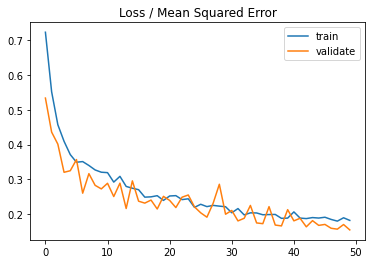

In [18]:
plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['mae'], label='train')
plt.plot(hist.history['val_mae'], label='validate')
plt.legend()

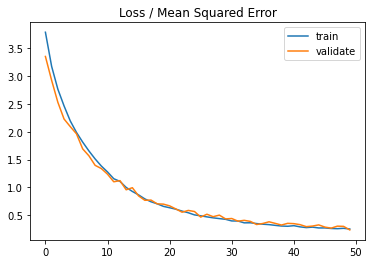

In [19]:
plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validate')
plt.legend()

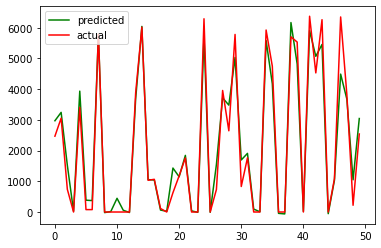

In [20]:
axis_x = [i for i in range(50)]

plt.plot(axis_x,y_predict[:50], label = "predicted", color = "green")
plt.plot(axis_x, y_test[:50], label = "actual",color = "red")
plt.legend()

In [21]:
d = df4.values
X = d[:,1:]
Y = d[:,:1]
# Y = Y.reshape(-1,1)


print(X.shape)
print(Y.shape)
print(type(X))

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


scaler_X = preprocessing.StandardScaler().fit(X)
scaler_Y = preprocessing.StandardScaler().fit(Y)
X_scale = scaler_X.transform(X)
X_train, X_val_and_test, Y_train_unscaled, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val_unscaled, Y_test_unscaled = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
Y_train = scaler_Y.transform(Y_train_unscaled)
Y_val =  scaler_Y.transform(Y_val_unscaled)
Y_test =  scaler_Y.transform(Y_test_unscaled)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras import regularizers


## kernel_initializer='normal'


model = Sequential()
model.add(Flatten(input_shape = X_train_sc.shape[1:]))
model.add(Dense(64, activation='relu',  kernel_initializer='normal', input_shape=(6,), kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

from keras.optimizers import Adam

#optimizer = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=50,
                validation_data=(X_val, Y_val))

(3182, 5)
(3182, 1)
<class 'numpy.ndarray'>
(2545, 5) (318, 5) (319, 5) (2545, 1) (318, 1) (319, 1)
Epoch 1/50
80/80 [==============================] - 1s 8ms/step - loss: 3.3696 - mae: 0.8101 - val_loss: 1.6417 - val_mae: 0.6839
Epoch 2/50
80/80 [==============================] - 0s 5ms/step - loss: 1.1997 - mae: 0.7006 - val_loss: 0.9154 - val_mae: 0.6763
Epoch 3/50
80/80 [==============================] - 0s 5ms/step - loss: 0.8531 - mae: 0.6838 - val_loss: 0.7772 - val_mae: 0.6578
Epoch 4/50
80/80 [==============================] - 0s 5ms/step - loss: 0.6471 - mae: 0.5383 - val_loss: 0.5324 - val_mae: 0.4480
Epoch 5/50
80/80 [==============================] - 0s 5ms/step - loss: 0.5304 - mae: 0.4525 - val_loss: 0.4209 - val_mae: 0.3477
Epoch 6/50
80/80 [==============================] - 0s 5ms/step - loss: 0.4535 - mae: 0.3793 - val_loss: 0.3096 - val_mae: 0.2460
Epoch 7/50
80/80 [==============================] - 0s 5ms/step - loss: 0.3779 - mae: 0.3140 - val_loss: 0.2743 - val_ma

20/20 [==============================] - 0s 3ms/step - loss: 0.2304 - mae: 0.1926
[0.23035067319869995, 0.192608043551445]
20/20 [==============================] - 0s 2ms/step
r2_score , 0.8648785663052184
explained_variance_scor,0.8654061399725457


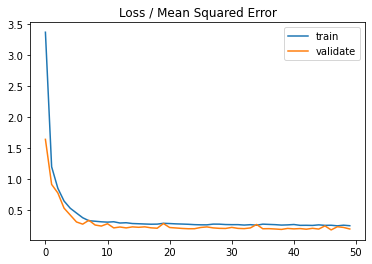

In [23]:
print(model.evaluate(X_test_sc, y_test_sc))
scaler_y = s.fit(y)

y_predict_sc = model.predict(X_test_sc)
y_predict = scaler_y.inverse_transform(y_predict_sc)

print(f'r2_score , {r2_score(y_test, y_predict)}')
print(f'explained_variance_scor,{explained_variance_score(y_test, y_predict)}')


plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validate')
plt.legend()


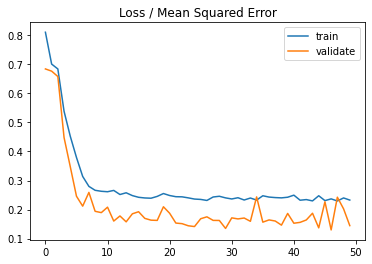

In [24]:
plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['mae'], label='train')
plt.plot(hist.history['val_mae'], label='validate')
plt.legend()

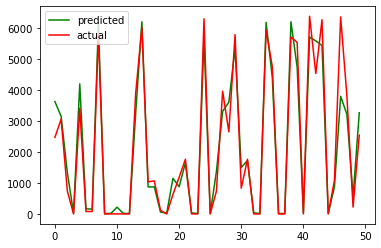

In [25]:
axis_x = [i for i in range(50)]

plt.plot(axis_x,y_predict[:50], label = "predicted", color = "green")
plt.plot(axis_x, y_test[:50], label = "actual",color = "red")
plt.legend()